<a href="https://colab.research.google.com/github/yaqubmir/Breathing/blob/main/Hypercapnia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
filepath = '/content/june30_2023_435_hypercapnia.csv'
import numpy as np

In [4]:
data = pd.read_csv(filepath)

In [80]:
data.columns

Index(['39', 'Date', 'time', 'time1', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', '1', '0', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', 'Frequency', '0.11', '0.12', '0.13',
       '0.14', '0.15', '0.16', '0.17', '0.18', '0.19', '0.20', '0.21', '0.22'],
      dtype='object')

In [5]:


data = data[['Date', 'time', 'time1', 'Frequency']]

In [6]:
def map_behaviour(frequency):
  if frequency>=500:
    return 'Snifing'
  elif frequency>=400 and frequency<500:
    return 'licking'
  elif frequency>=300 and frequency<400:
    return 'face scratching'
  elif frequency>=50:
    return 'calm'
  else:
    return 'rej'

In [7]:
data['behaviour'] = data['Frequency'].map(map_behaviour)

In [8]:
new_data = data[599:4199]
new_data

,Date,time,time1,Frequency,behaviour
599,30-Jun-23,3:05:18 PM.777,10:06.0,296,calm
600,30-Jun-23,3:05:19 PM.777,10:07.0,236,calm
601,30-Jun-23,3:05:20 PM.777,10:08.0,335,face scratching
602,30-Jun-23,3:05:21 PM.777,10:09.0,293,calm
603,30-Jun-23,3:05:22 PM.777,10:10.0,241,calm
...,...,...,...,...,...
4194,30-Jun-23,4:05:13 PM.777,10:01.0,243,calm
4195,30-Jun-23,4:05:14 PM.777,10:02.0,293,calm
4196,30-Jun-23,4:05:15 PM.777,10:03.0,147,calm
4197,30-Jun-23,4:05:16 PM.777,10:04.0,341,face scratching


In [9]:
data.to_csv('tc435.csv')

In [86]:
freq = []
for i in range(0, 60):
  if i >=20:
    temp = new_data[i*60:i*60+60]
    value = temp['Frequency'].mean()
    freq.append(value)
  else:
    temp = new_data[i*60:i*60+60]

    temp = temp[temp['behaviour'] == 'calm']

    value = temp['Frequency'].mean()
    if temp.shape[0] == 0:
      freq.append(130)
    else:
      freq.append(value)


In [87]:
data = {'frequency': freq}
data= pd.DataFrame(data)
data.to_csv('tc440_minute.csv')

In [88]:
from matplotlib import pyplot as plt
len(freq)

60

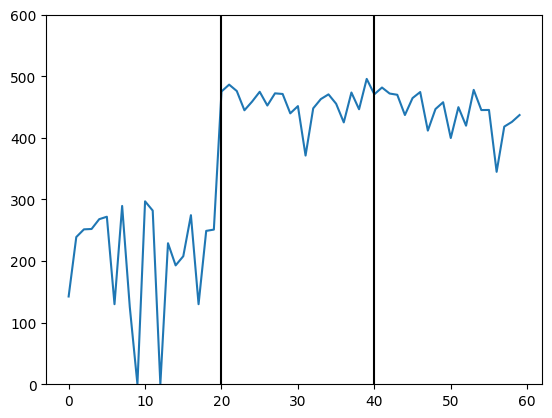

In [90]:
plt.plot([x for x in range(60)], freq)
x1= [20 for i in range(600)]
x2= [40 for i in range(600)]
y1 = [i for i in range(600)]

plt.plot(20)
plt.plot(x1, y1, color='black')
plt.plot(x2, y1, color='black')
plt.ylim(0,600)

plt.savefig('tc440.png', dpi=600)